# Reddit Project - 03A: Logistic Regression Model
***

## Import Packages

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

### Read in Data

In [94]:
spm = pd.read_csv('../data/spm_target.csv')

In [95]:
spm

,text,target,char_count,word_count,sentiment
0,Soul TribeJust trying to find my spiritual fam...,1,65,11,0.0000
1,THE JOURNEY TO LIFES RICHES BEGAN BY MAKING YO...,1,134,22,0.8964
2,Spiritual awakening amp relationshipsHi Im ...,1,953,174,-0.5804
3,SpartacusIn one of my visions I am in a Ludus ...,1,2133,371,0.7587
4,Mixing dreams with realities I often find ...,1,314,56,0.6705
...,...,...,...,...,...
19751,Meditation to help with Addictionremoved,0,40,5,0.4019
19752,Body scanWhen doing the body scan meditation...,0,589,104,0.5423
19753,How do I experience the extreme calm some peop...,0,397,72,0.9661
19754,Relentless obsessive mental chatterNot just du...,0,366,60,0.7266


### Create X, y, and train test split

In [98]:
X = spm['text']
y = spm['target']

np.random.seed(27)

X_train, X_test, y_train, y_test = train_test_split(X, y)

### Create a pipeline for Count Vectorizer and Logistic Regression

In [99]:
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('logreg', LogisticRegression())
    
])

### Establish Parameters for Logistic Regression, in this case Lasso ('l1'), and Ridge ('l2')

In [100]:
params = {
    'logreg__penalty': ['l1', 'l2']
    
}

### Instantiate Grid Search CV with pipeline, parmaters, and cv

In [101]:
gs = GridSearchCV(pipe, params, cv = 5)

### Fit GridesearchCV to X_train and y_train

In [101]:
gs.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('cvec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                            

### Build a function to print out an accuracy score and a confusion matrix

In [102]:
# build a function to print out a nice confusion matrix
preds = gs.best_estimator_.predict(X_test)
def nice_conmat(y_test, preds, classes):
    conmat = confusion_matrix(y_test, preds)
    print(f'Accuracy Score: {accuracy_score(y_test, preds)}')
    return pd.DataFrame(conmat, columns=['Predicted ' +class_ for class_ in classes], \
                index=['Actual '+ class_ for class_ in classes])
nice_conmat(y_test, preds, ['meditation', 'spirituality'])

Accuracy Score: 0.8572585543632314


,Predicted meditation,Predicted spirituality
Actual meditation,2094,352
Actual spirituality,353,2140


In [192]:
print(gs.score(X_train, y_train))
print(gs.score(X_test, y_test))

0.9798879665249376
0.8590807855841264


### The accuracy score of the Logistic Regression model using only text as the x variable was approximately 86%.  I would like to re-run the model using the numeric variables as well, but before doing so I would like to look at the coefficients of the features weighted in this first model.

### Look at Coefficients

In [103]:
coefs = gs.best_estimator_.named_steps['logreg'].coef_[0]
features = gs.best_estimator_.named_steps['cvec'].get_feature_names()

In [104]:
spm_coefs = pd.DataFrame({'features': features,
                         'coefficients': coefs})

In [105]:
spm_coefs = spm_coefs.sort_values('coefficients', ascending = False)
spm_coefs

,features,coefficients
35717,tarot,1.839520
33859,spiritual,1.766877
37648,twice,1.636180
33902,spiritually,1.486198
22401,message,1.461174
...,...,...
22157,meditationremoved,-1.861550
22053,meditating,-1.915466
22198,meditators,-2.128777
22086,meditation,-2.377316


### Exponentiate the coefficients

In [106]:
spm_coefs['exp_coefficients'] = np.exp(spm_coefs['coefficients'])
spm_coefs = spm_coefs.sort_values('exp_coefficients', ascending = False)
spm_coefs.head(10)[['features', 'exp_coefficients']]

,features,exp_coefficients
35717,tarot,6.293517
33859,spiritual,5.852547
37648,twice,5.135515
33902,spiritually,4.420258
22401,message,4.311016
24566,numerology,4.223249
33873,spirituality,3.953488
18588,intuition,3.845607
21697,mass,3.809727
12195,evil,3.581596


### Create 2 barplots, the first being the Top 10 Spirituality Coefficieents using (.head(10)) and the second being the Top 10 Meditation Coefficients using (.tail(10))

In [107]:
top_ten_coef = spm_coefs.head(10)[['features', 'exp_coefficients',]]
top_ten_coef = top_ten_coef.set_index('features')

<BarContainer object of 10 artists>

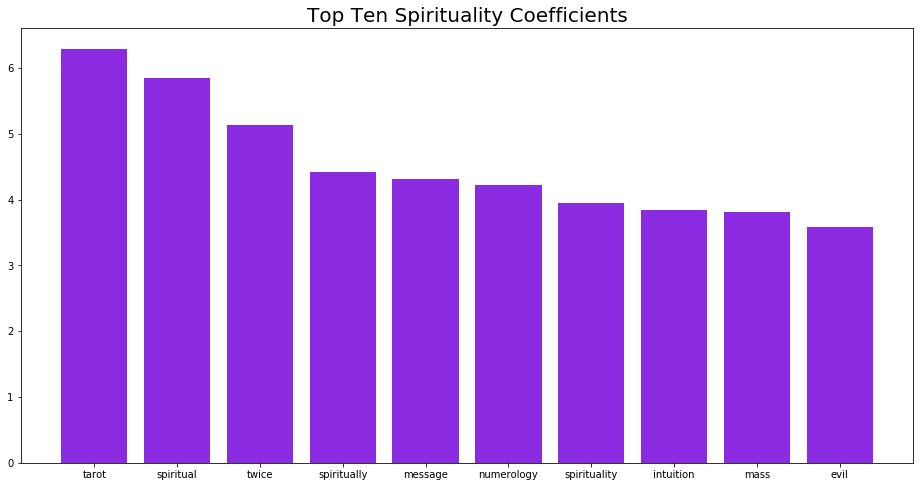

In [108]:
plt.figure(figsize=(16,8))
plt.title('Top Ten Spirituality Coefficients', fontsize = 20)
plt.bar(top_ten_coef.index, top_ten_coef['exp_coefficients'], color= 'blueviolet' )

In [109]:
bottom_ten_coef = spm_coefs.tail(10)[['features', 'exp_coefficients']]
bottom_ten_coef = bottom_ten_coef.set_index('features')

<BarContainer object of 10 artists>

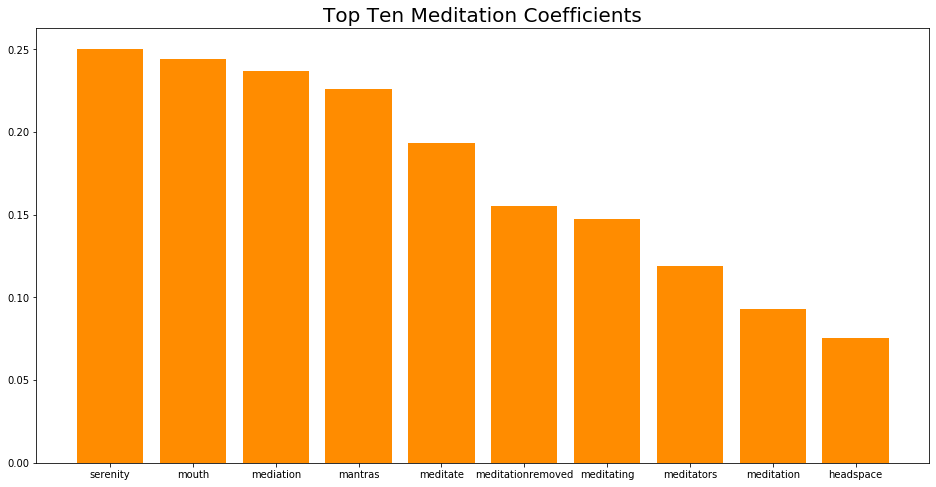

In [110]:
plt.figure(figsize=(16,8))
plt.title('Top Ten Meditation Coefficients', fontsize = 20)
plt.bar(bottom_ten_coef.index, bottom_ten_coef['exp_coefficients'], color = 'darkorange' )

### Both plots have at least 3 versions of spirituality and meditation present.  I will drop such words from the features list and create 2 new plots

In [111]:
spm_coefs

,features,coefficients,exp_coefficients
35717,tarot,1.839520,6.293517
33859,spiritual,1.766877,5.852547
37648,twice,1.636180,5.135515
33902,spiritually,1.486198,4.420258
22401,message,1.461174,4.311016
...,...,...,...
22157,meditationremoved,-1.861550,0.155432
22053,meditating,-1.915466,0.147273
22198,meditators,-2.128777,0.118983
22086,meditation,-2.377316,0.092799


### Determining which rows to drop based on index and dropping them below

In [120]:
spm_coefs_clean = spm_coefs.drop([33859 , 33902, 33873, 22086, 22198, 22053, 22157, 22028, 22158, 21971, 15851, 22476, 1761, 16260, 22195])

In [121]:
spm_coefs_clean

,features,coefficients,exp_coefficients
35717,tarot,1.839520,6.293517
37648,twice,1.636180,5.135515
22401,message,1.461174,4.311016
24566,numerology,1.440605,4.223249
18588,intuition,1.346932,3.845607
...,...,...,...
32291,shared,-1.244115,0.288196
32089,serenity,-1.384724,0.250393
23287,mouth,-1.409815,0.244188
21550,mantras,-1.487534,0.225929


## Make bar plots for the new list of coefficients

In [122]:
top_ten_coef_clean = spm_coefs_clean.head(10)[['features', 'exp_coefficients',]]
top_ten_coef_clean = top_ten_coef_clean.set_index('features')

<BarContainer object of 10 artists>

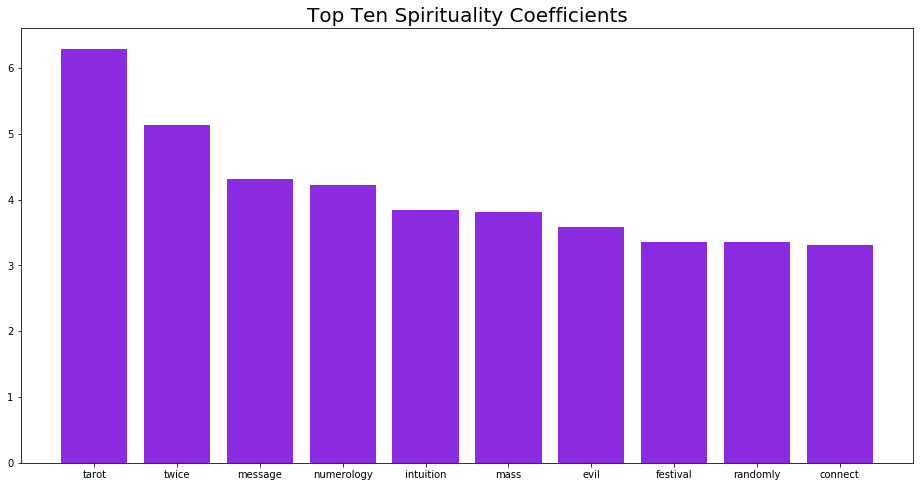

In [124]:
plt.figure(figsize=(16,8))
plt.title('Top Ten Spirituality Coefficients', fontsize = 20)
plt.bar(top_ten_coef_clean.index, top_ten_coef_clean['exp_coefficients'], color= 'blueviolet' )

In [125]:
top_ten_coef_clean = spm_coefs_clean.tail(10)[['features', 'exp_coefficients',]]
top_ten_coef_clean = top_ten_coef_clean.set_index('features')

<BarContainer object of 10 artists>

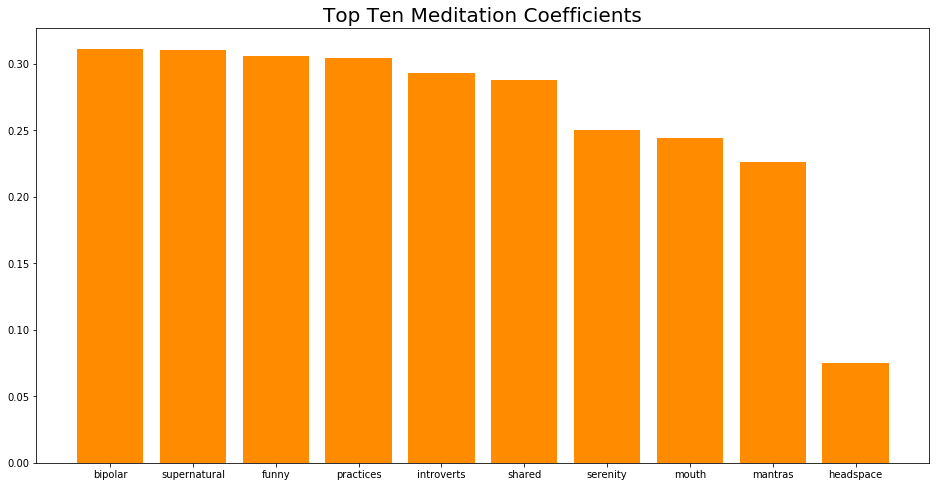

In [128]:
plt.figure(figsize=(16,8))
plt.title('Top Ten Meditation Coefficients', fontsize = 20)
plt.bar(top_ten_coef_clean.index, top_ten_coef_clean['exp_coefficients'], color= 'darkorange' )

### Create new Logistic Regression model, this time with word count and sentiment
*** 
### Create X, y, and train test split

In [184]:
X = spm[['text', 'word_count', 'sentiment']]
y = spm['target']

X_train, X_test, y_train, y_test = train_test_split(X, y)

### Create a function to return data from text and a function to return the numeric columns 'word_count', and 'sentiment'

In [185]:
get_text_data = FunctionTransformer(lambda x: x['text'], validate=False)
get_numeric_data = FunctionTransformer(lambda x: x[['word_count', 'sentiment']], validate=False)

### Create a pipeline containing Feature Union of the numeric and text features in addition to Count Vectorizer and Logistic Regression

In [186]:
# create the new pipeline
    # feature union
        # numeric
        # text
            # extract text
            # vectorize
    # model
pipe_v2 = Pipeline([
    ('features', FeatureUnion([
            ('numeric_features', Pipeline([
                ('selector', get_numeric_data),
                ('ss', StandardScaler())
            ])),
            ('text_features', Pipeline([
                ('selector', get_text_data),
                ('cvec', CountVectorizer())
            ]))
    ])),
    ('logreg', LogisticRegression())
])

### Create Parameters for Logreg function - Lasso ('l1') and Ridge ('l2')

In [187]:
params = {
    #'features__text_features__cvec__max_features' : [500, 1000],
    'logreg__penalty': ['l1', 'l2']
}

### Instantiate and fit Grid Search CV

In [188]:
gs = GridSearchCV(pipe_v2, params, cv = 5)

In [189]:
gs.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('features',
                                        FeatureUnion(n_jobs=None,
                                                     transformer_list=[('numeric_features',
                                                                        Pipeline(memory=None,
                                                                                 steps=[('selector',
                                                                                         FunctionTransformer(accept_sparse=False,
                                                                                                             check_inverse=True,
                                                                                                             func=<function <lambda> at 0x1a35d67320>,
                                                                                        

### Print out an accuracy score and a confusion matrix

In [190]:
preds = gs.best_estimator_.predict(X_test)

In [191]:
preds = gs.best_estimator_.predict(X_test)

nice_conmat(y_test, preds, ['meditation', 'spirituality'])

Accuracy Score: 0.8590807855841264


,Predicted meditation,Predicted spirituality
Actual meditation,2145,343
Actual spirituality,353,2098


### This second version of the Logistic Regression model gave me just about the same accuracy as the first.  Take a look at the next notebook to see how Decision Tree fairs.
***